In [ ]:
import os
import pandas as pd
import yfinance as yf

In [ ]:
import pandas as pd
import os
import yfinance as yf

if os.path.exists("nifty50.cvs"):
    n50 = pd.read_csv("nifty50.csv", index_col=0) #from index column 0
else:
    n50 = yf.Ticker("^NSEI")
    n50 = n50.history(period="1d", start="2000-1-1", end="2023-12-31")
    n50.to_csv("nifty50.csv")

n50.index = pd.to_datetime(n50.index) #creates the nifty50 dataframe




In [ ]:
n50

,Open,High,Low,Close,Volume,tomorrow,target
Date,,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,4546.200195,1
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,4732.350098,1
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,4747.549805,1
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,4837.549805,1
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,4932.200195,1
...,...,...,...,...,...,...,...
2023-10-11 00:00:00+05:30,19767.000000,19839.199219,19756.949219,19811.349609,213700,19794.000000,0
2023-10-12 00:00:00+05:30,19822.699219,19843.300781,19772.650391,19794.000000,217900,19751.050781,0
2023-10-13 00:00:00+05:30,19654.550781,19805.400391,19635.300781,19751.050781,255000,19731.750000,0


<Axes: xlabel='Date'>

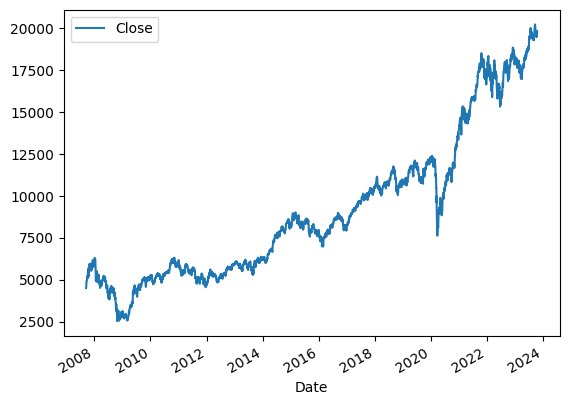

In [ ]:
n50.plot.line(y="Close", use_index=True) #just for visualising the data

deleting the divident and stock split values as they are not needed

In [ ]:
del n50["Dividends"]
del n50["Stock Splits"]
n50

,Open,High,Low,Close,Volume
Date,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0
...,...,...,...,...,...
2023-10-11 00:00:00+05:30,19767.000000,19839.199219,19756.949219,19811.349609,213700
2023-10-12 00:00:00+05:30,19822.699219,19843.300781,19772.650391,19794.000000,217900
2023-10-13 00:00:00+05:30,19654.550781,19805.400391,19635.300781,19751.050781,255000


Creating new columbs tomorrow and target

In [ ]:
n50["tomorrow"] = n50["Close"].shift(-1)
n50["target"] = (n50["tomorrow"] > n50["Close"]).astype(int)
n50

,Open,High,Low,Close,Volume,tomorrow,target
Date,,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,4546.200195,1
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,4732.350098,1
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,4747.549805,1
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,4837.549805,1
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,4932.200195,1
...,...,...,...,...,...,...,...
2023-10-11 00:00:00+05:30,19767.000000,19839.199219,19756.949219,19811.349609,213700,19794.000000,0
2023-10-12 00:00:00+05:30,19822.699219,19843.300781,19772.650391,19794.000000,217900,19751.050781,0
2023-10-13 00:00:00+05:30,19654.550781,19805.400391,19635.300781,19751.050781,255000,19731.750000,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier #sklearn is library for machine learning model

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1) #n_estimators is for number decision trees, min_smaple_split is for depth of each desicion tree, random_state will give the same output after training the model over and over again

train = n50.iloc[:-100] #previous 100 data
test = n50.iloc[-100:] #next 100 data

predictors = ["Close", "Volume", "Open", "High", "Low"] #stock dependent variables
model.fit(train[predictors], train["target"]) #setting the model to train

RandomForestClassifier(min_samples_split=100, random_state=1)

In [ ]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

1.0

<Axes: xlabel='Date'>

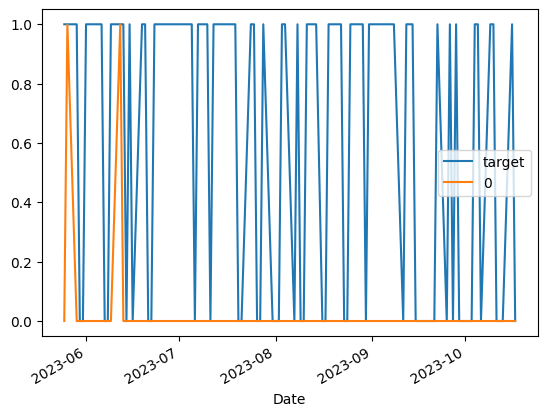

In [ ]:
combined = pd.concat([test["target"], preds], axis=1)
combined.plot()

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [ ]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [ ]:
predictions = backtest(n50, model, predictors)
predictions["Predictions"].value_counts()

1    745
0    698
Name: Predictions, dtype: int64

In [ ]:
precision_score(predictions["target"], predictions["Predictions"])

0.5395973154362416

In [ ]:
predictions["target"].value_counts() / predictions.shape[0]

1    0.545392
0    0.454608
Name: target, dtype: float64

In [ ]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = n50.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    n50[ratio_column] = n50["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    n50[trend_column] = n50.shift(1).rolling(horizon).sum()["target"]

    new_predictors+= [ratio_column, trend_column]

In [ ]:
n50 = n50.dropna(subset=n50.columns[n50.columns != "Tomorrow"])

In [ ]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [ ]:
predictions = backtest(n50, model, new_predictors)

In [ ]:
predictions["Predictions"].value_counts()

1    232
0    210
Name: Predictions, dtype: int64

In [ ]:
precision_score(predictions["target"], predictions["Predictions"])

0.625

In [ ]:
predictions["target"].value_counts() / predictions.shape[0]

1    0.527149
0    0.472851
Name: target, dtype: float64

In [ ]:
predictions

,target,Predictions
Date,,
2022-01-04 00:00:00+05:30,1,0.0
2022-01-05 00:00:00+05:30,0,0.0
2022-01-06 00:00:00+05:30,1,0.0
2022-01-07 00:00:00+05:30,1,0.0
2022-01-10 00:00:00+05:30,1,1.0
...,...,...
2023-10-10 00:00:00+05:30,1,1.0
2023-10-11 00:00:00+05:30,0,0.0
2023-10-12 00:00:00+05:30,0,0.0


In [ ]:
def predict_on_date(data, model, predictors, target_date):
    train = data[data.index < target_date].copy()
    test = data[data.index == target_date].copy()

    # Check if there is enough data for training
    if train.shape[0] < 1:
        print("Insufficient data for training.")
        return None

    model.fit(train[predictors], train['target'])
    preds = model.predict(test[predictors])
    target_status = test['target'].values[0]  # Access the first value in the 'Target' column
    return target_date, target_status, preds[0]

predict_date = "2023-10-17"
prediction = predict_on_date(n50, model, new_predictors, predict_date)
if prediction is not None:
    date, target, prediction_result = prediction
    print(f"On {date}, actual status: {target}, predicted status: {prediction_result}")
else:
    print("No data available for the target date.")








ValueError: ignored

In [ ]:
def predict_on_date(data, model, predictors ,target_date):
  train = data[data.index < target_date].copy()
  test = data[data.index == target_date].copy()

  model.fit(train[predictors], train['target'])
  preds = model.predict(test[predictors])
  target_status = test['target'].value[0] #taking the first value in the target_status list
  return target_date, target_status, preds[0]







predict_date = "2023-10-18"
prediction = predict_on_date(n50, model, new_predictors, predict_date)
if prediction is not None:
  date, target, prediction_result= prediction
  print(f"On {date}, actual status: {target}, predicted status: {prediction_result}")
else:
    print(f"No data available for the target date.")

ValueError: ignored

In [ ]:
ticker = '^NSEI'
ticker_data = yf.Ticker(ticker)
ticker_check = ticker_data.history(period= "1d", start = '2000-1-1', end = '2023-12-31')
del ticker_check['Dividends']
del ticker_check['Stock Splits']
ticker_check

,Open,High,Low,Close,Volume
Date,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0
...,...,...,...,...,...
2023-10-11 00:00:00+05:30,19767.000000,19839.199219,19756.949219,19811.349609,213700
2023-10-12 00:00:00+05:30,19822.699219,19843.300781,19772.650391,19794.000000,217900
2023-10-13 00:00:00+05:30,19654.550781,19805.400391,19635.300781,19751.050781,255000


In [ ]:
ticker_check['tomorrow']=ticker_check['Close'].shift(-1)
ticker_check['target']= (ticker_check['tomorrow']>ticker_check['Close']).astype(int)
del ticker_check['tomorrow']
ticker_check

,Open,High,Low,Close,Volume,target
Date,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,1
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,1
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,1
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,1
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,1
...,...,...,...,...,...,...
2023-10-11 00:00:00+05:30,19767.000000,19839.199219,19756.949219,19811.349609,213700,0
2023-10-12 00:00:00+05:30,19822.699219,19843.300781,19772.650391,19794.000000,217900,0
2023-10-13 00:00:00+05:30,19654.550781,19805.400391,19635.300781,19751.050781,255000,0
